In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split


**This is a classification problem in which we need to classify whether the loan will be approved or not. classification refers to a predictive modeling problem where a class label is predicted for a given example of input data. A few examples of classification problems are Spam Email detection, Cancer detection, Sentiment Analysis, etc**

In [3]:
#Import data sets
train = pd.read_excel("/content/train.xlsx")
test = pd.read_excel("/content/test.xlsx")

**Loan Approval Prediction Machine Learning**

In [4]:
train.shape

(614, 13)

**So we have 614 rows and 13 columns in our training dataset**

In [5]:
test.shape

(367, 12)

**In test data, we have 367 rows and 12 columns because the target column is not included in the test data**

In [6]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0.0,Graduate,No,5720.0,0.0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1.0,Graduate,No,3076.0,1500.0,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2.0,Graduate,No,5000.0,1800.0,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2.0,Graduate,No,2340.0,2546.0,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0.0,Not Graduate,No,3276.0,0.0,78.0,360.0,1.0,Urban


**Data Preprocessing** :
**Concatenating the train and test data for data preprocessing:**

In [8]:
data = pd.concat([train,test])

In [9]:
#Dropping the unwanted column:
data.drop("Loan_ID",axis=1,inplace=True)


In [10]:
#Identify missing values :
data.isnull().sum()

Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [11]:
for i in [data]:
  i["Gender"] = i["Gender"].fillna(data.Gender.dropna().mode()[0])
  i["Married"] = i["Married"].fillna(data.Married.dropna().mode()[0])
  i["Dependents"] = i["Dependents"].fillna(data.Dependents.dropna().mode()[0])
  i["Self_Employed"] = i["Self_Employed"].fillna(data.Self_Employed.dropna().mode()[0])
  i["Credit_History"] = i["Credit_History"].fillna(data.Credit_History.dropna().mode()[0])


#Fill null values with mode
# Next, we will be using Iterative imputer for filling missing values of LoanAmount and Loan_Amount_Term



In [13]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.ensemble import RandomForestRegressor 
data1 = data.loc[:, ['LoanAmount', 'Loan_Amount_Term']]

#Run  imputer with a Random Forest estimator

imp = IterativeImputer(RandomForestRegressor(), max_iter=10, random_state=0)
data1 = pd.DataFrame(imp.fit_transform(data1), columns=data1.columns)


/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


**So now as we have imputed all the missing values we go on to mapping the categorical variables with the integers.**

In [ ]:
for i in [data]:
  i["Property_Area"] = i["Property_Area"],map({"Urban":0,"Rural":1,"Semiurban":2}).astype(int)

  i["Dependents"]=i["Dependents"].map({"0":0,"1":1,"2":2,"3+":3})

  #We map the values so that we can input the train data into the model as the model does not accept any string values. 

**Exploratory Data Analysis (EDA)** 

In [14]:
# Splitting the data to new_train and new_test so that we can perform EDA

new_train = data.iloc[:614]
new_test = data.iloc[614:]


**Mapping ‘N’ to 0 and ‘Y’ to 1**

In [15]:
new_train["Loan_Status"] = new_train["Loan_Status"].map({'N':0,'Y':1}).astype(int)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


**Univariate Analysis:**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

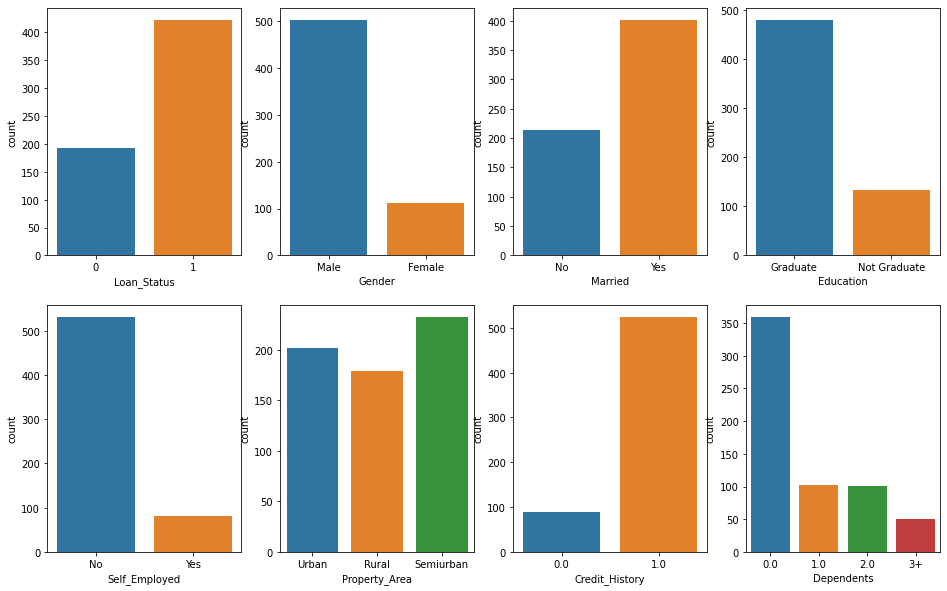

In [17]:
fig, ax = plt.subplots(2,4, figsize=(16,10))
sns.countplot('Loan_Status', data= new_train, ax=ax[0][0])
sns.countplot('Gender',data=new_train, ax=ax[0][1])
sns.countplot('Married',data=new_train, ax=ax[0][2])
sns.countplot('Education',data=new_train, ax=ax[0][3])
sns.countplot('Self_Employed',data=new_train, ax=ax[1][0])
sns.countplot('Property_Area',data=new_train, ax=ax[1][1])
sns.countplot('Credit_History',data=new_train, ax=ax[1][2])
sns.countplot('Dependents',data=new_train, ax=ax[1][3])




              


In [18]:
#Univariate Analysis Observations
"""
More Loans are approved Vs Rejected

Count of Male applicants is more than Female

Count of Married applicant is more than Non-married

Count of graduate is more than non-Graduate

Count of self-employed is less than that of Non-Self-employed

Maximum properties are located in Semiurban areas

Credit History is present for many applicants

The count of applicants with several dependents=0 is maximum.


"""

'\nMore Loans are approved Vs Rejected\n\nCount of Male applicants is more than Female\n\nCount of Married applicant is more than Non-married\n\nCount of graduate is more than non-Graduate\n\nCount of self-employed is less than that of Non-Self-employed\n\nMaximum properties are located in Semiurban areas\n\nCredit History is present for many applicants\n\nThe count of applicants with several dependents=0 is maximum.\n\n\n'

**Bivariate Analysis**


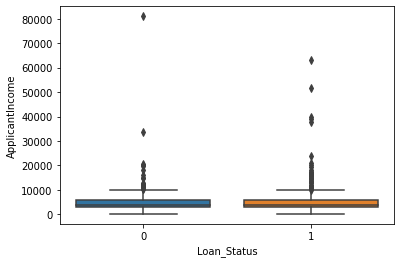

In [19]:
sns.boxplot(x='Loan_Status', y='ApplicantIncome',data=new_train)


**Mean ApplicantIncome of 0 and 1 are almost the same (o: no,1: Yes)**

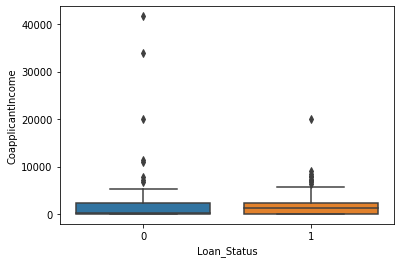

In [20]:
sns.boxplot(x='Loan_Status',y='CoapplicantIncome' , data=new_train)


**Mean Co- ApplicantIncome of 1 is slightly more than 0 (o: no,1 Yes)**

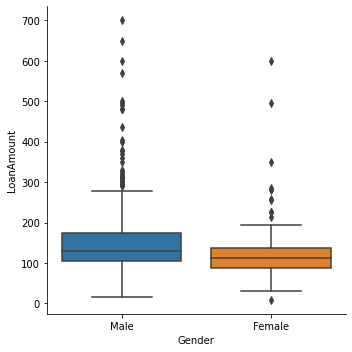

In [21]:
sns.catplot(x='Gender' , y='LoanAmount' , data=new_train,kind='box')

**The mean value of Loan Amount applied by males (0) is slightly higher than Females(1)**


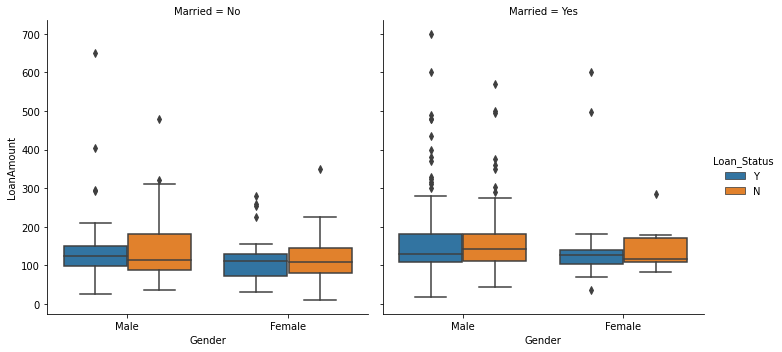

In [22]:
sns.catplot(x='Gender',y='LoanAmount' , data=data,kind='box', hue='Loan_Status', col='Married')


**If you are married then the loan amount requested is slightly higher than non-married**


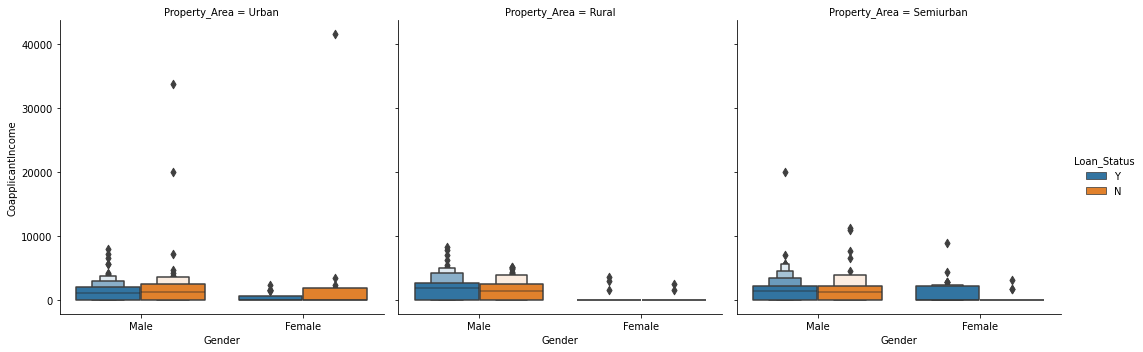

In [23]:
sns.catplot(x='Gender',y='CoapplicantIncome' , data=data,kind='boxen', hue='Loan_Status', col='Property_Area')

**Male have higher Co-applicant income than females in all three property areas**


**Correlation matrix**


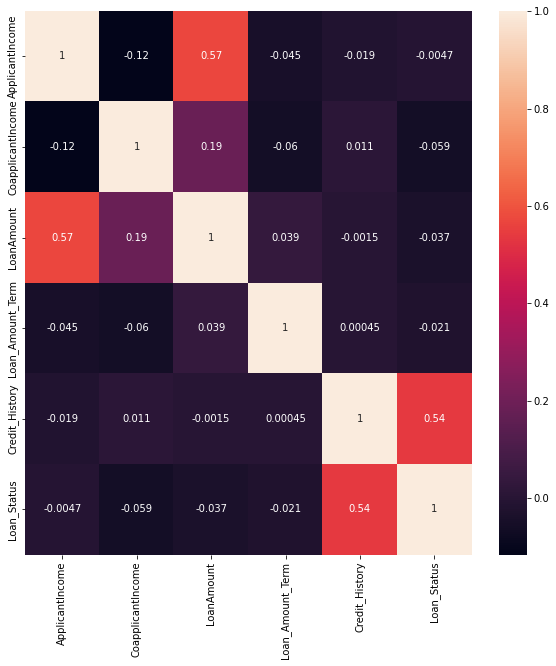

In [24]:
plt.figure(figsize = (10,10))
correlation_matrix = new_train.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

**Feature Engineering**


**Total Income :**


In [27]:
for i in [data]:
  i["TotalIncome"] = i["ApplicantIncome"]+i["CoapplicantIncome"]


**EMI:**



**Lets assume that interest rate=10.0 # hence r = ((10/12)/100) = 0.00833**


In [29]:
r = 0.0833
data['EMI']=data.apply(lambda x: (x['LoanAmount']*r*((1+r)**x['Loan_Amount_Term']))/((1+r)**((x['Loan_Amount_Term'])-1)), axis=1)
